<a href="https://colab.research.google.com/github/Shashwat-spyder/NYC-Taxi-Trip-Time/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [141]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [142]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from haversine import haversine

In [144]:
nyc_df=pd.read_csv('/content/Drive/My Drive/NYC Taxi Data (1).csv')

In [145]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [146]:
nyc_df.shape

(1458644, 11)

In [147]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [148]:
len(nyc_df[nyc_df.duplicated()])

0

In [149]:
data_dict={'id':'a unique identifier for each trip', 'vendor_id':'code indicating the provider associated with the trip record','pickup_datetime':'date and time when the meter was engaged', \
   'dropoff_datetime':'date and time when the meter was disengaged', 'passenger_count':'the number of passengers in the vehicle (driver entered value)', \
   'pickup_longitude':'the longitude where the meter was engaged', 'pickup_latitude':'the latitude where the meter was engaged', 'dropoff_longitude':' the longitude where the meter was disengaged', \
   'dropoff_latitude':'the latitude where the meter was disengaged', \
   'store_and_fwd_flag':' This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip'}

In [150]:
data_dict

{'dropoff_datetime': 'date and time when the meter was disengaged',
 'dropoff_latitude': 'the latitude where the meter was disengaged',
 'dropoff_longitude': '\u200athe longitude where the meter was disengaged',
 'id': 'a unique identifier for each trip',
 'passenger_count': 'the number of passengers in the vehicle (driver entered value)',
 'pickup_datetime': 'date and time when the meter was engaged',
 'pickup_latitude': 'the latitude where the meter was engaged',
 'pickup_longitude': 'the longitude where the meter was engaged',
 'store_and_fwd_flag': '\u200aThis flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server\u200a—\u200aY=store and forward; N=not a store and forward trip',
 'vendor_id': 'code indicating the provider associated with the trip record'}

In [151]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# **Exploratory Data Analysis**

In [152]:
list(nyc_df.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

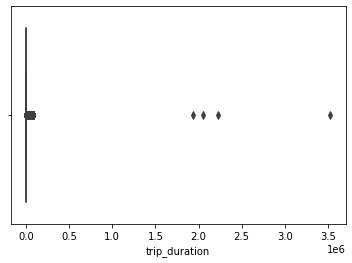

In [153]:
sns.boxplot(nyc_df['trip_duration'])

In [154]:
nyc_df['trip_duration'].sort_values(ascending=False).head(15)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
1221666      86378
91717        86378
1138915      86377
66346        86377
1284067      86369
Name: trip_duration, dtype: int64

In [155]:
nyc_df.drop(nyc_df[nyc_df['trip_duration'] >=1000000].index, inplace = True)

In [156]:
nyc_df[nyc_df['trip_duration']>=1000000]['trip_duration'].count()

0

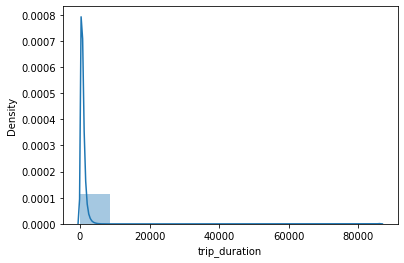

In [157]:
sns.distplot(nyc_df['trip_duration'],bins=10)

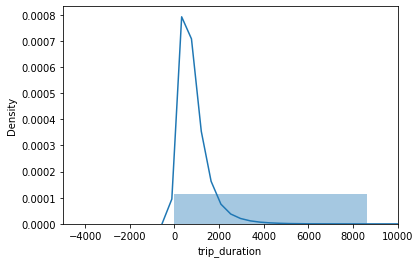

In [158]:
plt.xlim(-5000,10000)
sns.distplot(nyc_df['trip_duration'],bins=10)

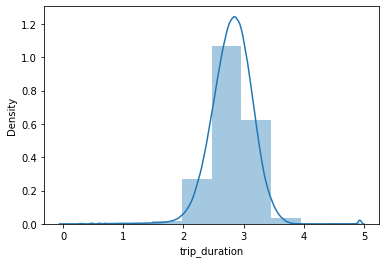

In [159]:
sns.distplot(np.log10(nyc_df['trip_duration']),bins=10)

In [160]:
log=np.log10(nyc_df['trip_duration'].skew())
print(log)
non_log=nyc_df['trip_duration'].skew()
print(non_log)

1.4025822695403904
25.268663357003835


We have dealt with target variable

In [161]:
nyc_df['vendor_id'].unique()

array([2, 1])

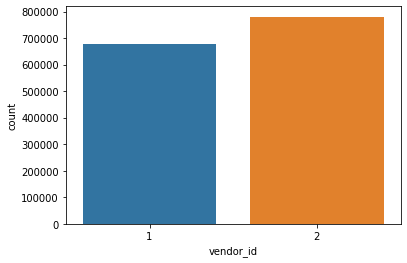

In [162]:
sns.countplot(x='vendor_id', data=nyc_df)

In [163]:
nyc_df[nyc_df['id'].duplicated()]['id'].count()

0

In [164]:
nyc_df['passenger_count'].sort_values(ascending=True)

217765     0
337809     0
1211269    0
278290     0
1092678    0
          ..
433304     7
824904     7
489613     7
826064     8
436047     9
Name: passenger_count, Length: 1458640, dtype: int64

In [165]:
nyc_df[nyc_df['passenger_count']==0]['passenger_count'].count()

60

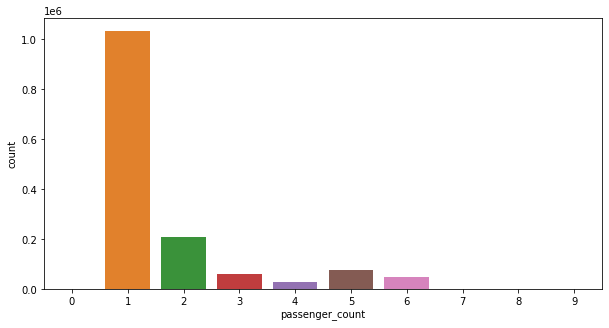

In [166]:
fig = plt.figure(figsize = (10, 5))
sns.countplot(x='passenger_count',data=nyc_df)

In [167]:
nyc_df['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [168]:
nyc_df.drop(nyc_df[nyc_df['passenger_count'] >=7].index, inplace = True)
nyc_df.drop(nyc_df[nyc_df['passenger_count'] ==0].index, inplace = True)

In [169]:
nyc_df['passenger_count'].value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

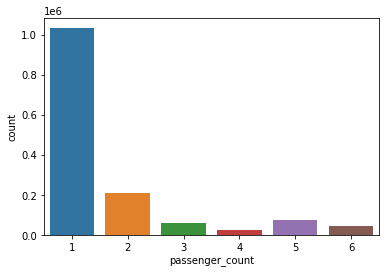

In [170]:
sns.countplot(x='passenger_count', data=nyc_df)

In [171]:
nyc_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [172]:
nyc_df['store_and_fwd_flag'].value_counts()

N    1450533
Y       8042
Name: store_and_fwd_flag, dtype: int64

In [173]:
type(nyc_df.loc[0]['store_and_fwd_flag'])

str

In [174]:
per_N=nyc_df[nyc_df['store_and_fwd_flag']=='N']['store_and_fwd_flag'].count()/nyc_df['store_and_fwd_flag'].count()*100 
print('Percentage of N values:',round(per_N,2),'%')

Percentage of N values: 99.45 %


In [175]:
per_Y=nyc_df[nyc_df['store_and_fwd_flag']=='Y']['store_and_fwd_flag'].count()/nyc_df['store_and_fwd_flag'].count()*100 
print('Percentage of Y values:',round(per_Y,2),'%')

Percentage of Y values: 0.55 %


we will drop store and fwd flag column as they make no sense for considering in this project. This will be done in latter part.

In [176]:
type(nyc_df.iloc[0,2])

str

In [177]:
nyc_df['pickup_datetime']=pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime']=pd.to_datetime(nyc_df['dropoff_datetime'])

In [178]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458575 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458575 non-null  object        
 1   vendor_id           1458575 non-null  int64         
 2   pickup_datetime     1458575 non-null  datetime64[ns]
 3   dropoff_datetime    1458575 non-null  datetime64[ns]
 4   passenger_count     1458575 non-null  int64         
 5   pickup_longitude    1458575 non-null  float64       
 6   pickup_latitude     1458575 non-null  float64       
 7   dropoff_longitude   1458575 non-null  float64       
 8   dropoff_latitude    1458575 non-null  float64       
 9   store_and_fwd_flag  1458575 non-null  object        
 10  trip_duration       1458575 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.5+ MB


In [179]:
# Delimit pickup_datetime variable 
nyc_df['pickup_date'] = nyc_df['pickup_datetime'].dt.date # Extract date
nyc_df['pickup_time'] = nyc_df['pickup_datetime'].dt.time # Extract time

# Delimit dropoff_datetime variables
nyc_df['dropoff_date'] = nyc_df['dropoff_datetime'].dt.date # Extract date
nyc_df['dropoff_time'] = nyc_df['dropoff_datetime'].dt.time # Extract time

# Additional pickup features
nyc_df['pickup_month'] = nyc_df['pickup_datetime'].dt.month # Extract month
nyc_df['pickup_hour'] = nyc_df['pickup_datetime'].dt.hour # Extract hour
nyc_df['pickup_weekday'] = nyc_df['pickup_datetime'].dt.day_name() # Extract day name

# Drop concatentated timestamp columns
nyc_df.drop(['pickup_datetime'], axis = 1, inplace = True)
nyc_df.drop(['dropoff_datetime'], axis = 1, inplace = True)

# Confirm changes
nyc_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

# **Exploratory Data Analysis (EDA)**

Target Variable

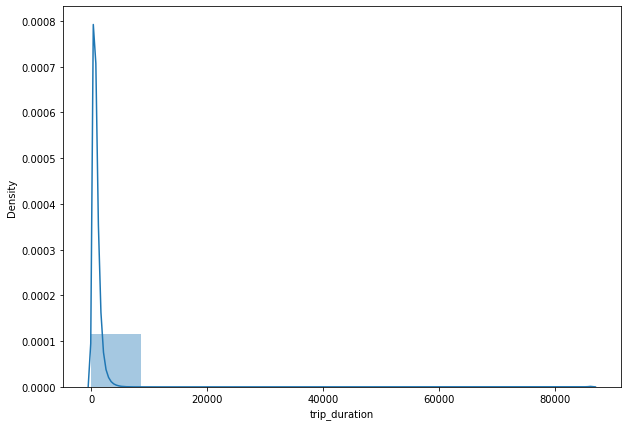

In [180]:
# sns.scattertplot(nyc_df['trip_duration'])
fig, ax = plt.subplots(figsize =(10, 7))
sns.distplot(nyc_df['trip_duration'],bins=10)

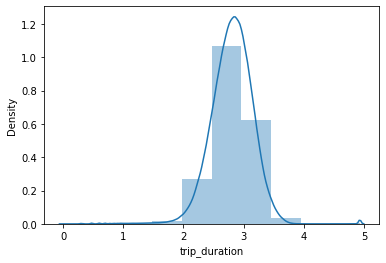

In [181]:
sns.distplot(np.log10(nyc_df['trip_duration']),bins=10)

Feature Variables

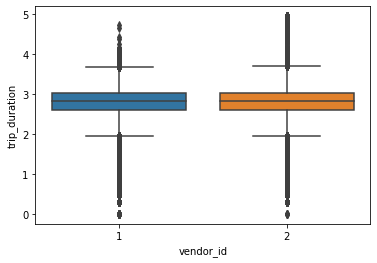

In [182]:
sns.boxplot( x=nyc_df['vendor_id'], y=np.log10(nyc_df['trip_duration']))

In [183]:
# nyc_df['trip_duration']=np.log10(nyc_df['trip_duration'])
nyc_df.groupby('vendor_id')['trip_duration'].describe()

,count,mean,std,min,25%,50%,75%,max
vendor_id,,,,,,,,
1,678307.0,831.098759,659.663072,1.0,395.0,658.0,1068.0,52376.0
2,780268.0,1058.572829,4288.299818,1.0,399.0,666.0,1082.0,86392.0


The trip duration od both vendors is similar

In [184]:
nyc_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday'],
      dtype='object')

In [185]:
nyc_df['Y'] = np.where(nyc_df['store_and_fwd_flag']=='Y', 1, 0)
nyc_df['N'] = np.where(nyc_df['store_and_fwd_flag']=='N', 1, 0)



nyc_df.groupby('vendor_id')['Y','N'].sum()

,Y,N
vendor_id,,
1,8042,670265
2,0,780268


Lets check 

In [186]:
c=nyc_df.groupby('vendor_id')['Y','N'].sum().reset_index()
print(c)

   vendor_id     Y       N
0          1  8042  670265
1          2     0  780268


(0.0, 10000.0)

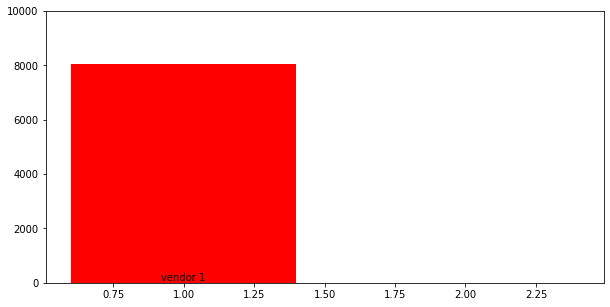

In [187]:
num_yes=c['Y']
vendor=c['vendor_id']

fig= plt.figure(figsize=(10,5))

plt.bar(vendor,num_yes, color='red', )
# plt.text(1,8042)

for i in range(0,len(c['Y'])):
  if i==1:
    plt.text(i,c['Y'][i],'vendor 1',ha='center', va='bottom')
  if i==2:
    plt.text(i,c['Y'][i],'vendor 2',ha='center', va='bottom')

plt.ylim([0,10000])

In [188]:
nyc_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday', 'Y', 'N'],
      dtype='object')

In [189]:
# variables=list(nyc_df.columns)

# for col in variables[0:-1]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = nyc_df[col]
#     label = np.log10(nyc_df['trip_duration'])
#     correlation = feature.corr(label)         
#     plt.scatter(x=feature, y=label)
#     plt.xlabel(col)
#     plt.ylabel('Trip Duration')
#     ax.set_title('Trip Duration VS ' + col + '- correlation: ' + str(correlation))
#     z = np.polyfit(nyc_df[col], np.log10(nyc_df['trip_duration']), 1)
#     y_hat = np.poly1d(z)(nyc_df[col])

#     plt.plot(nyc_df[col], y_hat, "r--", lw=1)

# plt.show()

**Assumptions Checking**

In [190]:
nyc_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458575.0,1.53,0.50,1.00,1.00,2.00,2.00,2.00
passenger_count,1458575.0,1.66,1.31,1.00,1.00,1.00,2.00,6.00
pickup_longitude,1458575.0,-73.97,0.07,-121.93,-73.99,-73.98,-73.97,-61.34
pickup_latitude,1458575.0,40.75,0.03,34.36,40.74,40.75,40.77,51.88
dropoff_longitude,1458575.0,-73.97,0.07,-121.93,-73.99,-73.98,-73.96,-61.34
dropoff_latitude,1458575.0,40.75,0.04,32.18,40.74,40.75,40.77,43.92
trip_duration,1458575.0,952.79,3170.61,1.00,397.00,662.00,1075.00,86392.00
pickup_month,1458575.0,3.52,1.68,1.00,2.00,4.00,5.00,6.00
pickup_hour,1458575.0,13.61,6.40,0.00,9.00,14.00,19.00,23.00
Y,1458575.0,0.01,0.07,0.00,0.00,0.00,0.00,1.00


In [191]:
86392-121.93  #the max and min values indicate the data has high variability. Also due to a big difference between std and mean.

86270.07

High variability is not good for linear regression model. Lets check in depth into this with plots of each independent variable against dependent variable.

In [192]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458575 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458575 non-null  object 
 1   vendor_id           1458575 non-null  int64  
 2   passenger_count     1458575 non-null  int64  
 3   pickup_longitude    1458575 non-null  float64
 4   pickup_latitude     1458575 non-null  float64
 5   dropoff_longitude   1458575 non-null  float64
 6   dropoff_latitude    1458575 non-null  float64
 7   store_and_fwd_flag  1458575 non-null  object 
 8   trip_duration       1458575 non-null  int64  
 9   pickup_date         1458575 non-null  object 
 10  pickup_time         1458575 non-null  object 
 11  dropoff_date        1458575 non-null  object 
 12  dropoff_time        1458575 non-null  object 
 13  pickup_month        1458575 non-null  int64  
 14  pickup_hour         1458575 non-null  int64  
 15  pickup_weekday 

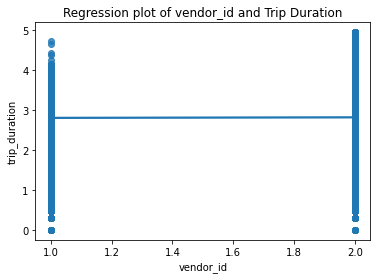

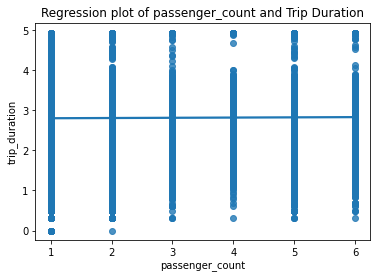

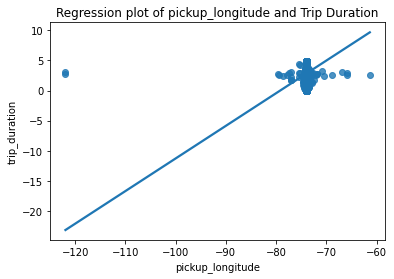

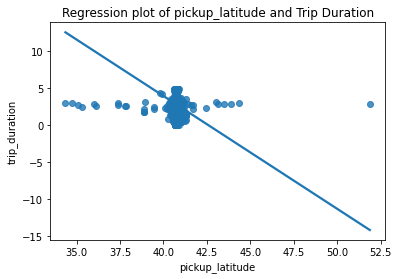

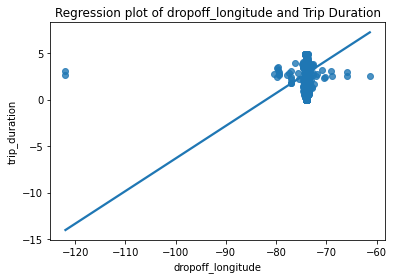

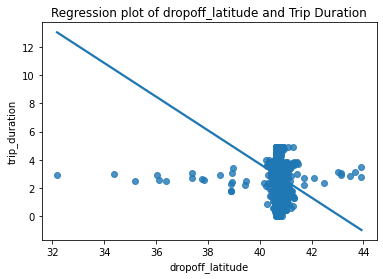

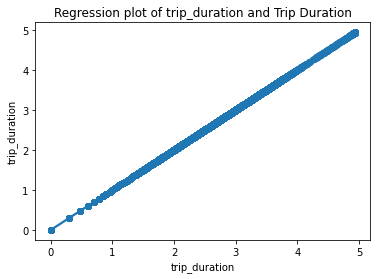

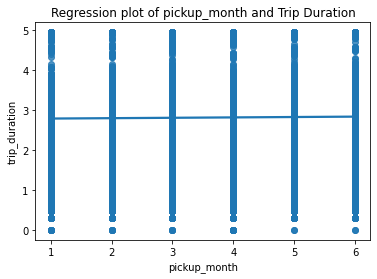

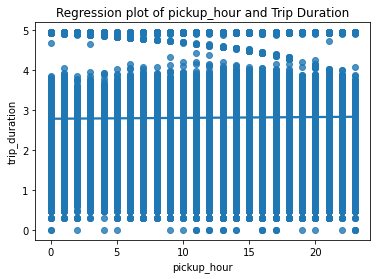

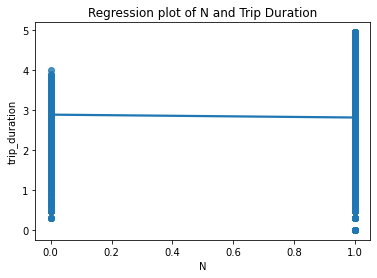

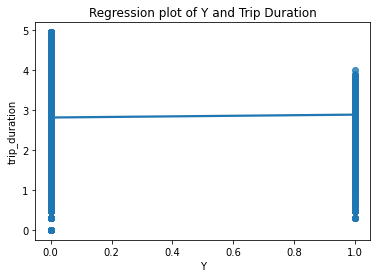

In [193]:
nyc_df['trip_duration']=np.log10(nyc_df['trip_duration'])
variables = ['vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_month', 'pickup_hour', 'N', 'Y']
for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='trip_duration', data=nyc_df, ci=None).set(title=f'Regression plot of {var} and Trip Duration')

Lets start with cleaning pickup,dropoff latitude and longitudes which have a linear relationship with trip_duration.

Latitude is between 40.7128 and 40.748817
Longitude is between - 74.0059 and - 73.968285

['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']

In [194]:
nyc_df.shape

(1458575, 18)

In [195]:
model_df=nyc_df[nyc_df['pickup_latitude']>=40.7128]
model_df=model_df[model_df['pickup_latitude']<=40.748817]
model_df=model_df[model_df['dropoff_latitude']>=40.7128]
model_df=model_df[model_df['dropoff_latitude']<=40.748817]
model_df=model_df[model_df['pickup_longitude']>=-74.0059]
model_df=model_df[model_df['pickup_longitude']<=-73.968285]
model_df=model_df[model_df['dropoff_longitude']<=-73.968285]
model_df=model_df[model_df['dropoff_longitude']>=-74.0059]
model_df.shape

(189946, 18)

# **Plot a barplot for each categorical variable**

In [196]:
# #@title Default title text
# # plot a bar plot for each categorical feature count (except car_ID)

# for col in numeric_features[1:]:
#     fig = plt.figure(figsize=(9, 6))
#     ax = fig.gca()
#     feature = dataset[col]
#     feature.hist(bins=50, ax = ax)
#     ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
#     ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
#     ax.set_title(col)
# plt.show()

# **Feature Engineering**

To find 

speed 

distance

In [197]:
model_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday', 'Y', 'N'],
      dtype='object')

# **Distance/ haversine distance**

In [198]:
def distance(lat1,long1,lat2,long2):
  '''Function to find sperical distance from one point to another
  lat- longitude
  long-longitude
  1-pickup location
  2-dropoff location
  '''
  distance = haversine((lat1,long1),(lat2,long1))+haversine((lat1,long1),(lat1,long2))
  return distance

In [199]:
model_df["distance"] = model_df.apply(lambda row: distance(row.pickup_latitude, row.pickup_longitude,row.dropoff_latitude,row.dropoff_longitude), axis=1)

In [200]:
model_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,pickup_hour,pickup_weekday,Y,N,distance
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2.821514,2016-06-12,00:43:35,2016-06-12,00:54:38,6,0,Sunday,0,1,2.430509
8,id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,N,2.406540,2016-05-27,23:12:23,2016-05-27,23:16:38,5,23,Friday,0,1,1.774807
17,id1154431,1,1,-73.994255,40.745804,-73.999657,40.723343,N,2.863917,2016-04-14,08:48:26,2016-04-14,09:00:37,4,8,Thursday,0,1,2.952593
19,id3390316,2,1,-73.983887,40.738197,-73.991203,40.727871,N,2.399674,2016-06-05,13:47:23,2016-06-05,13:51:34,6,13,Sunday,0,1,1.764684
37,id2403238,1,1,-73.988068,40.728081,-73.980751,40.721470,N,2.442480,2016-06-23,23:00:09,2016-06-23,23:04:46,6,23,Thursday,0,1,1.351631


In [201]:
model_df["speed"] = (model_df["distance"]) / (10**(model_df["trip_duration"])/3600)


In [202]:
model_df['speed']

1          13.197336
8          25.056097
17         14.540812
19         25.310206
37         17.566318
             ...    
1458618    13.753998
1458623    12.550856
1458628    19.453631
1458630    11.923972
1458639     7.708522
Name: speed, Length: 189946, dtype: float64

In [203]:
model_df['speed'].max()

462.3891804521239

In [204]:
model_df=model_df[model_df['speed']<=50]
model_df=model_df[model_df['speed']>=2]
model_df.shape

(186516, 20)

In [205]:
model_df.head()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_month,pickup_hour,pickup_weekday,Y,N,distance,speed
1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,2.821514,2016-06-12,00:43:35,2016-06-12,00:54:38,6,0,Sunday,0,1,2.430509,13.197336
8,id1301050,1,1,-73.999481,40.738400,-73.985786,40.732815,N,2.406540,2016-05-27,23:12:23,2016-05-27,23:16:38,5,23,Friday,0,1,1.774807,25.056097
17,id1154431,1,1,-73.994255,40.745804,-73.999657,40.723343,N,2.863917,2016-04-14,08:48:26,2016-04-14,09:00:37,4,8,Thursday,0,1,2.952593,14.540812
19,id3390316,2,1,-73.983887,40.738197,-73.991203,40.727871,N,2.399674,2016-06-05,13:47:23,2016-06-05,13:51:34,6,13,Sunday,0,1,1.764684,25.310206
37,id2403238,1,1,-73.988068,40.728081,-73.980751,40.721470,N,2.442480,2016-06-23,23:00:09,2016-06-23,23:04:46,6,23,Thursday,0,1,1.351631,17.566318


# **Linear Regression Model**

In [102]:
model_df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday', 'Y', 'N', 'distance', 'speed'],
      dtype='object')

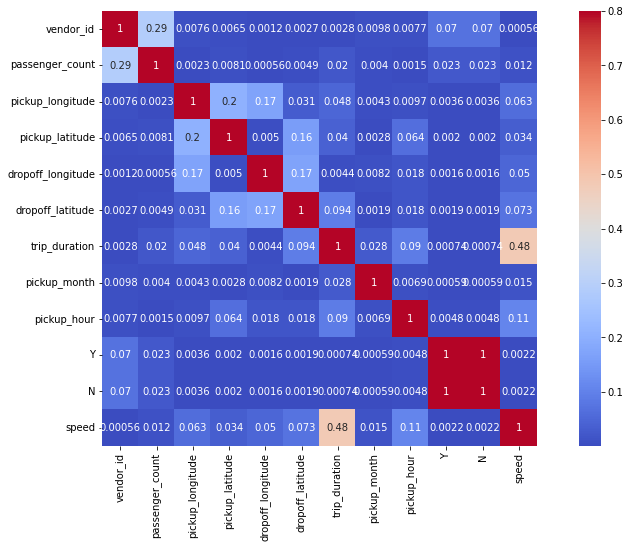

In [209]:
corrmat=model_df[['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday', 'Y', 'N',  'speed']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(abs(corrmat),annot=True, vmax=0.8, square=True, cmap='coolwarm')

Dropping off columns with high colinearity i.e 'Y' & 'N'.

In [ ]:
# nyc_df.drop(nyc_df['Y'])
# nyc_df.drop(nyc_df[nyc_df['passenger_count'] >=7].index, inplace = True)
# model_df.drop('Y', inplace=True, axis=1)
# model_df.drop('N', inplace=True, axis=1)
# model_df.drop('distance', inplace=True, axis=1)
# model_df.drop('speed', inplace=True, axis=1)
# model_df.columns

# **Variance Inflation factor**

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [105]:
calc_vif(model_df[[i for i in model_df.describe().columns if i in ['id', 'vendor_id', 'passenger_count', 
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday', 'Y', 'N', 'distance', 'speed']]])

,variables,VIF
0,vendor_id,1.098659
1,passenger_count,1.093380
2,trip_duration,3.064265
3,pickup_month,1.001072
4,pickup_hour,1.013296
5,Y,2.032980
6,N,252.178516
7,distance,88.434393
8,speed,76.060606


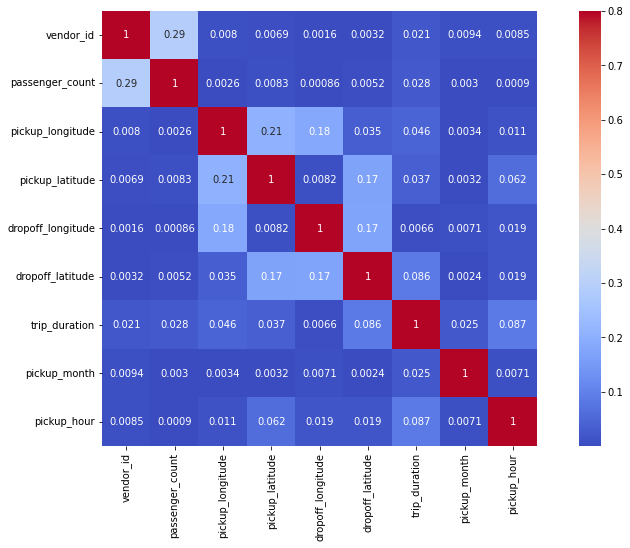

In [106]:
corrmat=model_df[['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday']].corr()
plt.figure(figsize=(15,8))
sns.heatmap(abs(corrmat),annot=True, vmax=0.8, square=True, cmap='coolwarm')

In [107]:
calc_vif(model_df[[i for i in model_df.describe().columns if i in ['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date', 'pickup_time',
       'dropoff_date', 'dropoff_time', 'pickup_month', 'pickup_hour',
       'pickup_weekday']]])

,variables,VIF
0,vendor_id,1.139519e+01
1,passenger_count,2.852071e+00
2,pickup_longitude,5.521457e+07
3,pickup_latitude,1.943026e+07
4,dropoff_longitude,5.497561e+07
5,dropoff_latitude,1.856874e+07
6,trip_duration,8.269501e+01
7,pickup_month,5.294789e+00
8,pickup_hour,5.003544e+00


Lets drop very high values of VIF i.e pickup_longitude and pickup_latitude and then check again.

The above columns will be considered for modeling

In [108]:
model_df['speed']

1          0.861420
8          0.737493
17         1.030963
19         0.735385
37         0.553385
             ...   
1458618    0.546716
1458623    0.704002
1458628    0.745187
1458630    0.663755
1458639    0.576240
Name: speed, Length: 189939, dtype: float64

In [221]:
req_columns= ['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration',
       'pickup_month', 'pickup_hour',
       'speed']
model=model_df[req_columns]
model.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_hour,speed
1,1,1,-73.980415,40.738564,-73.999481,40.731152,2.821514,6,0,13.197336
8,1,1,-73.999481,40.738400,-73.985786,40.732815,2.406540,5,23,25.056097
17,1,1,-73.994255,40.745804,-73.999657,40.723343,2.863917,4,8,14.540812
19,2,1,-73.983887,40.738197,-73.991203,40.727871,2.399674,6,13,25.310206
37,1,1,-73.988068,40.728081,-73.980751,40.721470,2.442480,6,23,17.566318


In [222]:
 dependent_variable='trip_duration'
independent_variables=list(set(model.columns.tolist())-{dependent_variable})

In [224]:
independent_variables

['pickup_month',
 'dropoff_longitude',
 'pickup_longitude',
 'pickup_hour',
 'passenger_count',
 'vendor_id',
 'pickup_latitude',
 'dropoff_latitude',
 'speed']

In [225]:
#Create independent varibale dataset
X = model[independent_variables]

#Create dependent variable dataset
y=model[dependent_variable]

In [226]:
X[:7][:]

,pickup_month,dropoff_longitude,pickup_longitude,pickup_hour,passenger_count,vendor_id,pickup_latitude,dropoff_latitude,speed
1,6,-73.999481,-73.980415,0,1,1,40.738564,40.731152,13.197336
8,5,-73.985786,-73.999481,23,1,1,40.738400,40.732815,25.056097
17,4,-73.999657,-73.994255,8,1,1,40.745804,40.723343,14.540812
19,6,-73.991203,-73.983887,13,1,2,40.738197,40.727871,25.310206
37,6,-73.980751,-73.988068,23,1,1,40.728081,40.721470,17.566318
43,3,-73.980667,-73.976471,1,1,1,40.739780,40.729965,14.329911
44,2,-73.994728,-73.979645,7,1,2,40.739632,40.723495,19.739085


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [228]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [229]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [230]:
y_predict=regressor.predict(X_test)

In [233]:
r2_score(10**(y_test),10**(y_predict))

0.1870353893701011

In [232]:
regressor.score(X_train, y_train)

0.2424397697596612

In [ ]:
from numpy import math
math.sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_predict)

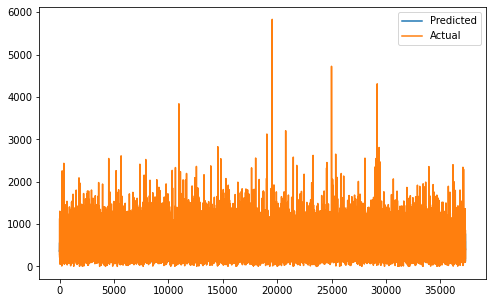

In [236]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_predict))
plt.plot((10**(np.array(y_test))))
plt.legend(["Predicted","Actual"])
plt.show()

# **Such a low score indicated we might consider some other model **
#**Lets perform a ridge and ridge cv operations for more efficient model accuracy**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std= StandardScaler()
X_train_std= std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train_std,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test_std)

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test_std.shape[0]-1)/(X_test_std.shape[0]-X_test_std.shape[1]-1)))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
X_train_std

In [ ]:
X_test_std

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
y_predict

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred_ridge))

In [ ]:
r2_score(y_test,y_pred_ridge)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_ridge, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred_ridge), max(y_test))
p2 = min(min(y_pred_ridge), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
regressor.score(X_train,y_train)

In [ ]:
regressor.score(X_test,y_test)

In [ ]:
regressor.intercept_

In [ ]:
feature_names = X.columns

In [ ]:
feature_names